In [1]:
#pip install matplotlib

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter



In [3]:
pd.options.display.float_format = '{:,.2f}'.format


In [4]:
df = pd.read_csv('grocerydb.csv')
df_cats  = df.groupby(by='category')[['price','Protein','Total Fat','Carbohydrate','Sugars, total','Sodium','Fiber, total dietary','Cholesterol','FPro']].mean()
df_cats_size = df.groupby(by='category').size()

In [5]:
df2 = pd.DataFrame(df_cats_size)
df2.rename(columns={0:'Count'},inplace=True)
df2.reset_index()

,category,Count
0,baby-food,126
1,baking,382
2,bread,689
3,breakfast,289
4,cakes,404
5,cereal,800
6,cheese,1011
7,coffee-beans-wf,126
8,cookies-biscuit,1228
9,culinary-ingredients,194


In [6]:
df_cats.sort_values(by='Sugars, total',ascending = False, inplace = True)

In [7]:
df_cats = df_cats.merge(df2,left_on='category',right_on='category',how='inner')
df_cats.reset_index(inplace=True)
df_cats.sort_values(by='Count',ascending=False,inplace=True,ignore_index=True)
df_cats['colors'] = np.linspace(0, 1, len(df_cats['category']))

In [8]:
df_final_data = df_cats[['category','price','Sugars, total','FPro','Count','colors']]
df_final_data.sort_values('FPro', ascending=False)  

,category,price,"Sugars, total",FPro,Count,colors
3,cookies-biscuit,3.89,30.65,0.93,1228,0.06
20,cakes,5.60,30.25,0.92,404,0.39
13,bread,3.89,6.17,0.91,689,0.25
32,muffins-bagels,4.11,15.62,0.91,253,0.63
8,snacks-chips,3.39,4.19,0.88,978,0.16
4,snacks-mixes-crackers,3.63,10.44,0.88,1116,0.08
15,rolls-buns-wraps,3.53,4.78,0.87,659,0.29
24,pizza,5.81,3.08,0.87,372,0.47
37,snacks-popcorn,3.84,7.08,0.86,208,0.73
29,breakfast,4.14,9.23,0.86,289,0.57


In [9]:
norm = colors.Normalize(vmin=df_final_data['FPro'].min(),vmax=df_final_data['FPro'].max())
scalar_mappable = cm.ScalarMappable(norm=norm, cmap='viridis')
scalar_mappable.set_array([])


/var/folders/x3/2hzhwqqs64bg9zlfssbvx_1m0000gn/T/ipykernel_17027/210008588.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


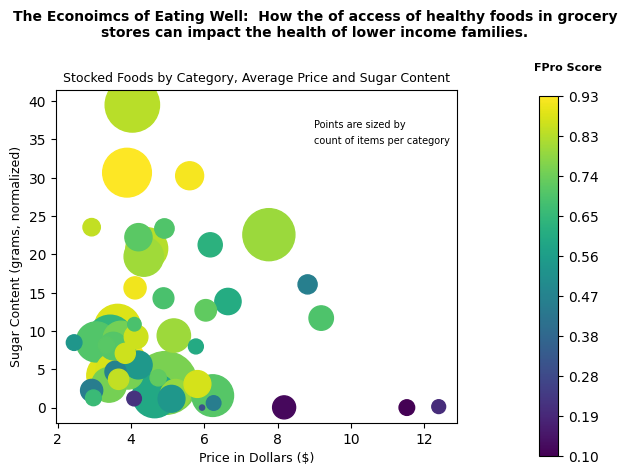

In [10]:
fig = plt.figure()
plt.suptitle(f"The Econoimcs of Eating Well:  How the of access of healthy foods in grocery stores can impact the health of lower income families.",fontsize=10,weight=1000,wrap=True)

plt.title(f"Stocked Foods by Category, Average Price and Sugar Content",fontsize=9,wrap=True)
plt.scatter(df_final_data['price'],
            df_final_data['Sugars, total'],
            sizes=df_final_data['Count'], 
            c=df_final_data['FPro'])
plt.text(9,36.5,'Points are sized by ', fontsize=7,wrap=True)
plt.text(9,34.5,'count of items per category', fontsize=7,wrap=True)

plt.text(15,44,'FPro Score', weight=1000, fontsize=8)
plt.xlabel("Price in Dollars ($)",fontsize=9)
plt.ylabel("Sugar Content (grams, normalized)",fontsize=9)

cax = plt.gcf().add_axes([.85,.05, 0.03, 0.75])
cbar = plt.colorbar(
            scalar_mappable,
            ticks=np.linspace(df_final_data['FPro'].min(), df_final_data['FPro'].max(), 10),
            cax=cax,
            orientation='vertical'
            )

cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.show()